In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')

In [2]:
df = pd.read_excel("data_set_label.xlsx")
x = []

for i in range(1 , 51, 1):
    for j in range(1, 51 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            if(i == 1 and j==2 ):
                img= np.split(img , indices_or_sections=2 , axis=1)
                x =  img
            else:
                img = np.split(img , indices_or_sections=2 , axis=1)
                x = np.append(x , img , axis = 0)
for i in range(101 , 151 , 1):
    for j in range(101, 151 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = np.split(img , indices_or_sections=2 , axis=1)
            x = np.append(x , img, axis=0)
for i in range(151 , 201 , 1):
    for j in range(151, 201 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = np.split(img , indices_or_sections=2 , axis=1)
            x = np.append(x , img  , axis=0)
del df

In [3]:
df_pp = pd.read_csv("pp_modeling.csv")
label_0 = np.asarray(df_pp['label_0'])
label_1 = np.asarray(df_pp['label_1'])
label_2 = np.asarray(df_pp['label_2'])
label_3 = np.asarray(df_pp['label_3'])

y_pp = np.zeros((200 , 4 ))
for i in range(200):
    l = np.zeros((4))
    l[0]=  label_0[i]
    l[1]=  label_1[i]
    l[2]=  label_2[i]
    l[3]=  label_3[i]
    y_pp[i] = l

df_p = pd.read_csv("p_modeling.csv")
label_0 = np.asarray(df_p['label_0'])
label_1 = np.asarray(df_p['label_1'])
label_2 = np.asarray(df_p['label_2'])
label_3 = np.asarray(df_p['label_3'])

y_p = np.zeros((200 , 4 ))
for i in range(200):
    l = np.zeros((4))
    l[0]=  label_0[i]
    l[1]=  label_1[i]
    l[2]=  label_2[i]
    l[3]=  label_3[i]
    y_p[i] = l

df_r = pd.read_csv("r_modeling.csv")
label_0 = np.asarray(df_r['label_0'])
label_1 = np.asarray(df_r['label_1'])
label_2 = np.asarray(df_r['label_2'])
label_3 = np.asarray(df_r['label_3'])

y_r = np.zeros((200 , 4 ))
for i in range(200):
    l = np.zeros((4))
    l[0]=  label_0[i]
    l[1]=  label_1[i]
    l[2]=  label_2[i]
    l[3]=  label_3[i]
    y_r[i] = l


y = np.append(y_pp , y_p)
y = np.append(y , y_r)

In [4]:
m = x.reshape(600 , 2 , 224 , 224 , 4)
m.shape

(600, 2, 224, 224, 4)

In [5]:
y = y.reshape(-1 , 4)
y.shape

(600, 4)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
    vertical_flip= True , horizontal_flip=True
)

In [7]:
mm = np.zeros((600 , 224 , 224 , 3))
j = 0
for i in m:
    mm[j] = resize(i[0]-i[1] , (224 , 224 , 3))
    j = j+1

## Training for push P joints

In [8]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(mm[0:199] , y[0:199]/1000 , test_size=0.1 ,random_state=5)

In [9]:
import tensorflow as tf

In [10]:
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate , Dropout , BatchNormalization
from keras.regularizers import L1L2

# Define the input shape for the images
input_shape = (224, 224, 3)

input = Input(shape=input_shape, name='input')




x = Conv2D(128, kernel_size=(3 , 3) , activation="relu" , kernel_regularizer=L1L2(l1= 0.001 , l2 = 0.001) )(input)
x= Dropout(0.1)(x)
x = Conv2D(128, kernel_size=(3 , 3) , activation="relu" , kernel_regularizer=L1L2(l1= 0.001 , l2 = 0.001) )(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

# batchnormalization befoe concate

#concate two inputs
# before flatten, we do another layer of convolutions

x = Conv2D(96, kernel_size=(3 , 3) , activation='relu' )(x)
x = Dropout(0.1)(x)
x = Conv2D(96, kernel_size=(3 , 3) , activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(64, kernel_size=(3 , 3) , activation='relu' )(x)
x = Dropout(0.1)(x)
x = Conv2D(64, kernel_size=(3 , 3) , activation='relu' )(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(64, kernel_size=(3 , 3) , activation='relu'  )(x)
x = Dropout(0.1)(x)
x = Conv2D(64, kernel_size=(3 , 3) , activation='relu' )(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(32, kernel_size=(3 , 3) , activation='relu' )(x)
x = Dropout(0.1)(x)
x = Conv2D(32 ,  kernel_size=(3 , 3) , activation='relu' )(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
#flatting

x = Flatten()(x)


output_1 = Dense(32 , activation='relu')(x)
output_2 = Dense(32 , activation='relu')(x)
output_3 = Dense(32 , activation='relu')(x)
output_4 = Dense(32 , activation='relu')(x)


output_1 = Dropout(0.1)(output_1)
output_2 = Dropout(0.1)(output_2)
output_3 = Dropout(0.1)(output_3)
output_4 = Dropout(0.1)(output_4)


output_1 = Dense(1 ,activation = 'linear' , kernel_regularizer=L1L2(l1= 0.001 , l2 = 0.001))(output_1 )
output_2 = Dense(1 , activation = 'linear', kernel_regularizer=L1L2(l1= 0.001 , l2 = 0.001))(output_2 )
output_3 = Dense(1, activation = 'linear' , kernel_regularizer=L1L2(l1= 0.001 , l2 = 0.001))(output_3 )
output_4 = Dense(1 , activation = 'linear' , kernel_regularizer=L1L2(l1= 0.001 , l2 = 0.001))(output_4)

# Create the model with the two inputs and one output
model = Model(inputs = input, outputs=[output_1 ,output_2 , output_3 ,  output_4])

# Compile the model with an optimizer, a loss function and a metric
model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.huber, metrics=[keras.metrics.mse] )

# Print the model summary
model.summary()


2023-09-26 12:18:41.726312: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-26 12:18:41.726731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 128)        3584      ['input[0][0]']               
                                                                                                  
 dropout (Dropout)           (None, 222, 222, 128)        0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 220, 220, 128)        147584    ['dropout[0][0]']             
                                                                                              

In [11]:
y_train.shape

(179, 4)

In [12]:
y_1_train, y_2_train , y_3_train , y_4_train = tf.split(y_train, num_or_size_splits=4, axis=1)

y_1_test, y_2_test , y_3_test , y_4_test = tf.split(y_test, num_or_size_splits=4, axis=1)


In [13]:
y_test[0]

array([0.105, 0.15 , 0.13 , 0.153])

In [14]:
y_1_train.set_shape((len(y_1_train) ,1))
y_2_train.set_shape((len(y_1_train) ,1))
y_3_train.set_shape((len(y_1_train) ,1))
y_4_train.set_shape((len(y_1_train)  ,1))

y_1_test.set_shape((len(y_1_test)  ,1))
y_2_test.set_shape((len(y_1_test) ,1))
y_3_test.set_shape((len(y_1_test) ,1))
y_4_test.set_shape((len(y_1_test)  ,1))

In [15]:
y_train_n = np.append(y_1_train , y_2_train ,axis=1)
y_train_n = np.append(y_train_n , y_3_train ,axis=1)
y_train_n = np.append(y_train_n , y_4_train ,axis=1)

y_test_n = np.append(y_1_test , y_2_test ,axis=1)
y_test_n = np.append(y_test_n , y_3_test ,axis=1)
y_test_n = np.append(y_test_n , y_4_test ,axis=1)

In [16]:
y_1_train[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.054])>

In [17]:
y_train_n = y_train_n.reshape(len(y_train_n) , 4)
y_test_n = y_test_n.reshape(len(y_test_n) , 4)

In [18]:
from sklearn.metrics import mean_pinball_loss , d2_pinball_score , explained_variance_score , r2_score



In [19]:
l = model.fit(
    x_train, y_train_n , batch_size=10 , steps_per_epoch=len(x_train)//10,
    validation_data=(x_test, y_test_n)  , 
    epochs = 70 , verbose = 1  )

Epoch 1/70


2023-09-26 12:20:34.411421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 6.1695 - dense_4_loss: 0.4462 - dense_5_loss: 0.2389 - dense_6_loss: 0.7212 - dense_7_loss: 0.7873 - dense_4_mean_squared_error: 1.1775 - dense_5_mean_squared_error: 0.6577 - dense_6_mean_squared_error: 2.2506 - dense_7_mean_squared_error: 2.6996

2023-09-26 12:20:42.703218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 10s 259ms/step - loss: 6.1695 - dense_4_loss: 0.4462 - dense_5_loss: 0.2389 - dense_6_loss: 0.7212 - dense_7_loss: 0.7873 - dense_4_mean_squared_error: 1.1775 - dense_5_mean_squared_error: 0.6577 - dense_6_mean_squared_error: 2.2506 - dense_7_mean_squared_error: 2.6996 - val_loss: 3.8802 - val_dense_4_loss: 0.0018 - val_dense_5_loss: 0.0064 - val_dense_6_loss: 0.0073 - val_dense_7_loss: 0.0099 - val_dense_4_mean_squared_error: 0.0035 - val_dense_5_mean_squared_error: 0.0128 - val_dense_6_mean_squared_error: 0.0146 - val_dense_7_mean_squared_error: 0.0198
Epoch 2/70
17/17 [==============================] - 6s 231ms/step - loss: 4.4474 - dense_4_loss: 0.1480 - dense_5_loss: 0.0701 - dense_6_loss: 0.2326 - dense_7_loss: 0.2919 - dense_4_mean_squared_error: 0.3175 - dense_5_mean_squared_error: 0.1512 - dense_6_mean_squared_error: 0.6233 - dense_7_mean_squared_error: 0.7398 - val_loss: 3.5650 - val_dense_4_loss: 0.0027 - val_dense_5_loss: 0.0208 - va

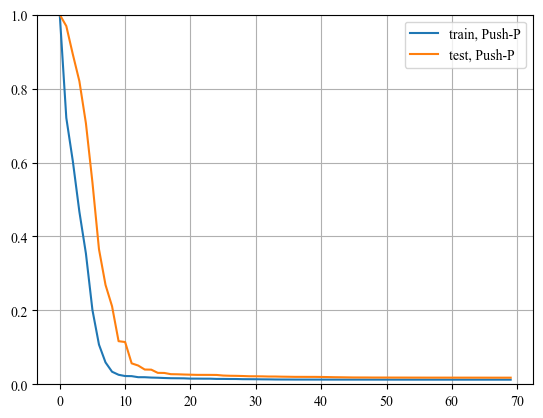

In [22]:
d1 = np.asanyarray(l.history['loss'])
d2 = np.asanyarray(l.history['val_loss'])
plt.plot(np.sort(d1/max(d1))[::-1] ,  label = 'train, Push-P')
plt.plot(np.sort(d2/max(d2))[::-1] ,label = 'test, Push-P')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.savefig("regression-push-p.SVG" , dpi = 2400)
plt.show()

In [24]:

x_t_svm = rgb2gray(x_train)
x_v_svm = rgb2gray(x_test)
x_t_svm = x_t_svm.reshape(len(x_t_svm) , -1)
x_v_svm = x_v_svm.reshape(len(x_v_svm) , -1)
y_svm_train = np.sqrt(np.square(y_1_train)  +np.square(y_2_train) +np.square(y_3_train)+np.square(y_4_train))
y_svm_test= np.sqrt(np.square(y_1_test)  +np.square(y_2_test) +np.square(y_3_test)+np.square(y_4_test))

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
reg = forest.fit(x_t_svm ,y_svm_train )
pred_2 = reg.predict(x_v_svm)
1 - np.sum(np.abs(y_svm_test-pred_2))

/var/folders/f5/0zxl9sdd2pgfq6v24qf62qlm0000gn/T/ipykernel_7054/1955221155.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg = forest.fit(x_t_svm ,y_svm_train )


-8.517692379500499

In [25]:
from sklearn.svm import SVR

svr = SVR(kernel = 'poly')
reg = svr.fit(x_t_svm ,y_svm_train)

pred_2 = reg.predict(x_v_svm)
1 - np.sum(np.abs(y_svm_test-pred_2))

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-16.196200559877603

In [26]:
pred = model.predict(x_test)
compare_pred = np.sqrt(np.square(pred[0]) + np.square(pred[1]) + np.square(pred[2]) + np.square(pred[3]))
1 - np.sum(np.abs(y_svm_test-compare_pred))

1/1 [==============================] - 0s 82ms/step


0.6741429343751695

In [27]:
from sklearn.metrics import r2_score

r2_score(y_svm_test ,compare_pred )

-0.18163889618475326

In [28]:
r2_score(y_svm_test ,pred_2 )
#for SVM

-0.7798270153843958

In [29]:
r2_score(y_svm_test ,pred_2 )

-0.7798270153843958

In [30]:
del forest

In [45]:
model.save("motion_detector_push_p.h5")

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## For P-joint

In [31]:

x_train , x_test , y_train , y_test = train_test_split(mm[200:399] , y[200:399]/1000 , test_size=0.1 ,random_state=5)

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.huber, metrics=[keras.metrics.mse] )
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 128)        3584      ['input[0][0]']               
                                                                                                  
 dropout (Dropout)           (None, 222, 222, 128)        0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 220, 220, 128)        147584    ['dropout[0][0]']             
                                                                                              

In [32]:
y_1_train, y_2_train , y_3_train , y_4_train = tf.split(y_train, num_or_size_splits=4, axis=1)

y_1_test, y_2_test , y_3_test , y_4_test = tf.split(y_test, num_or_size_splits=4, axis=1)
y_1_train.set_shape((len(y_1_train) ,1))
y_2_train.set_shape((len(y_1_train) ,1))
y_3_train.set_shape((len(y_1_train) ,1))
y_4_train.set_shape((len(y_1_train)  ,1))

y_1_test.set_shape((len(y_1_test)  ,1))
y_2_test.set_shape((len(y_1_test) ,1))
y_3_test.set_shape((len(y_1_test) ,1))
y_4_test.set_shape((len(y_1_test)  ,1))

y_train_n = np.append(y_1_train , y_2_train ,axis=1)
y_train_n = np.append(y_train_n , y_3_train ,axis=1)
y_train_n = np.append(y_train_n , y_4_train ,axis=1)

y_test_n = np.append(y_1_test , y_2_test ,axis=1)
y_test_n = np.append(y_test_n , y_3_test ,axis=1)
y_test_n = np.append(y_test_n , y_4_test ,axis=1)

y_train_n = y_train_n.reshape(len(y_train_n) , 4)
y_test_n = y_test_n.reshape(len(y_test_n) , 4)

In [33]:
l = model.fit(
    x_train, y_train_n , batch_size=10 , steps_per_epoch=len(x_train)//10,
    validation_data=(x_test, y_test_n)  , 
    epochs = 70 , verbose = 1  )

Epoch 1/70


2023-09-26 12:26:23.185033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 0.0599 - dense_4_loss: 7.5469e-04 - dense_5_loss: 7.7354e-04 - dense_6_loss: 7.6415e-04 - dense_7_loss: 7.6710e-04 - dense_4_mean_squared_error: 0.0015 - dense_5_mean_squared_error: 0.0015 - dense_6_mean_squared_error: 0.0015 - dense_7_mean_squared_error: 0.0015

2023-09-26 12:26:28.835138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 7s 281ms/step - loss: 0.0599 - dense_4_loss: 7.5469e-04 - dense_5_loss: 7.7354e-04 - dense_6_loss: 7.6415e-04 - dense_7_loss: 7.6710e-04 - dense_4_mean_squared_error: 0.0015 - dense_5_mean_squared_error: 0.0015 - dense_6_mean_squared_error: 0.0015 - dense_7_mean_squared_error: 0.0015 - val_loss: 0.0879 - val_dense_4_loss: 0.0044 - val_dense_5_loss: 0.0023 - val_dense_6_loss: 0.0046 - val_dense_7_loss: 0.0170 - val_dense_4_mean_squared_error: 0.0087 - val_dense_5_mean_squared_error: 0.0047 - val_dense_6_mean_squared_error: 0.0093 - val_dense_7_mean_squared_error: 0.0339
Epoch 2/70
17/17 [==============================] - 5s 232ms/step - loss: 0.0411 - dense_4_loss: 6.7214e-04 - dense_5_loss: 6.8679e-04 - dense_6_loss: 6.9071e-04 - dense_7_loss: 6.7871e-04 - dense_4_mean_squared_error: 0.0013 - dense_5_mean_squared_error: 0.0014 - dense_6_mean_squared_error: 0.0014 - dense_7_mean_squared_error: 0.0014 - val_loss: 0.0487 - val_dense_4_loss: 5.9685e

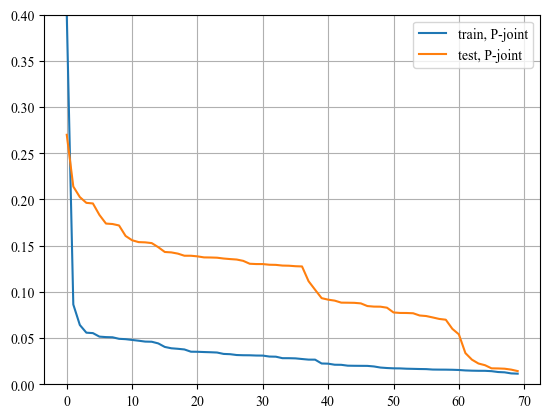

In [48]:
d1 = np.asanyarray(l.history['loss'])
d2 = np.asanyarray(l.history['val_loss'])
plt.plot(np.sort(d1/max(d1)-0.6)[::-1] ,  label = 'train, P-joint')
plt.plot(np.sort(d2/max(d2)-0.1)[::-1]*0.3 ,label = 'test, P-joint')
plt.ylim([0, 0.4])
plt.grid()
plt.legend()
plt.savefig("regression-p-join.SVG")
plt.show()

In [49]:
pred = model.predict(x_test)
compare_pred = np.sqrt(np.square(pred[0]) + np.square(pred[1]) + np.square(pred[2]) + np.square(pred[3]))
1 - np.sum(np.abs(y_svm_test-compare_pred))

2023-09-26 12:33:26.861145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 514ms/step


-0.5587129955572239

In [61]:
model.save("motion_detector_p.h5")

/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
x_t_svm = rgb2gray(x_train)
x_v_svm = rgb2gray(x_test)

x_t_svm = x_t_svm.reshape(len(x_t_svm) , -1)
x_v_svm = x_v_svm.reshape(len(x_v_svm) , -1)
y_svm_train = np.sqrt(np.square(y_1_train)  +np.square(y_2_train) +np.square(y_3_train)+np.square(y_4_train))
y_svm_test= np.sqrt(np.square(y_1_test)  +np.square(y_2_test) +np.square(y_3_test)+np.square(y_4_test))

forest = RandomForestRegressor()
reg = forest.fit(x_t_svm ,y_svm_train )
pred_2 = reg.predict(x_v_svm)
1 - np.sum(np.abs(y_svm_test-pred_2))

/var/folders/f5/0zxl9sdd2pgfq6v24qf62qlm0000gn/T/ipykernel_7054/1656082156.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg = forest.fit(x_t_svm ,y_svm_train )


-5.361295037981939

In [51]:
r2_score(y_svm_test , compare_pred)

-14.489231249665357

In [52]:
r2_score(y_svm_test , pred_2)

0.3330094610671138

## For R-joint

In [53]:
x_train , x_test , y_train , y_test = train_test_split(mm[400:599] , y[400:599]/1000 , test_size=0.1 ,random_state=5)

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.huber, metrics=[keras.metrics.mse] )
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 128)        3584      ['input[0][0]']               
                                                                                                  
 dropout (Dropout)           (None, 222, 222, 128)        0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 220, 220, 128)        147584    ['dropout[0][0]']             
                                                                                              

In [54]:
y_1_train, y_2_train , y_3_train , y_4_train = tf.split(y_train, num_or_size_splits=4, axis=1)

y_1_test, y_2_test , y_3_test , y_4_test = tf.split(y_test, num_or_size_splits=4, axis=1)
y_1_train.set_shape((len(y_1_train) ,1))
y_2_train.set_shape((len(y_1_train) ,1))
y_3_train.set_shape((len(y_1_train) ,1))
y_4_train.set_shape((len(y_1_train)  ,1))

y_1_test.set_shape((len(y_1_test)  ,1))
y_2_test.set_shape((len(y_1_test) ,1))
y_3_test.set_shape((len(y_1_test) ,1))
y_4_test.set_shape((len(y_1_test)  ,1))

y_train_n = np.append(y_1_train , y_2_train ,axis=1)
y_train_n = np.append(y_train_n , y_3_train ,axis=1)
y_train_n = np.append(y_train_n , y_4_train ,axis=1)

y_test_n = np.append(y_1_test , y_2_test ,axis=1)
y_test_n = np.append(y_test_n , y_3_test ,axis=1)
y_test_n = np.append(y_test_n , y_4_test ,axis=1)

y_train_n = y_train_n.reshape(len(y_train_n) , 4)
y_test_n = y_test_n.reshape(len(y_test_n) , 4)

In [55]:
l = model.fit(
    x_train, y_train_n , batch_size=10, steps_per_epoch=len(x_train)//10,
    validation_data=(x_test, y_test_n)  , 
    epochs = 70 , verbose = 1  )

Epoch 1/70


2023-09-26 12:34:03.623490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 0.0383 - dense_4_loss: 8.1313e-04 - dense_5_loss: 8.1612e-04 - dense_6_loss: 8.1180e-04 - dense_7_loss: 8.1000e-04 - dense_4_mean_squared_error: 0.0016 - dense_5_mean_squared_error: 0.0016 - dense_6_mean_squared_error: 0.0016 - dense_7_mean_squared_error: 0.0016

2023-09-26 12:34:09.568594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 7s 306ms/step - loss: 0.0383 - dense_4_loss: 8.1313e-04 - dense_5_loss: 8.1612e-04 - dense_6_loss: 8.1180e-04 - dense_7_loss: 8.1000e-04 - dense_4_mean_squared_error: 0.0016 - dense_5_mean_squared_error: 0.0016 - dense_6_mean_squared_error: 0.0016 - dense_7_mean_squared_error: 0.0016 - val_loss: 0.0712 - val_dense_4_loss: 7.7103e-04 - val_dense_5_loss: 0.0144 - val_dense_6_loss: 0.0032 - val_dense_7_loss: 0.0400 - val_dense_4_mean_squared_error: 0.0015 - val_dense_5_mean_squared_error: 0.0287 - val_dense_6_mean_squared_error: 0.0065 - val_dense_7_mean_squared_error: 0.0799
Epoch 2/70
17/17 [==============================] - 5s 230ms/step - loss: 0.0196 - dense_4_loss: 8.2160e-04 - dense_5_loss: 8.2025e-04 - dense_6_loss: 8.1535e-04 - dense_7_loss: 8.1441e-04 - dense_4_mean_squared_error: 0.0016 - dense_5_mean_squared_error: 0.0016 - dense_6_mean_squared_error: 0.0016 - dense_7_mean_squared_error: 0.0016 - val_loss: 0.0251 - val_dense_4_loss: 7.5

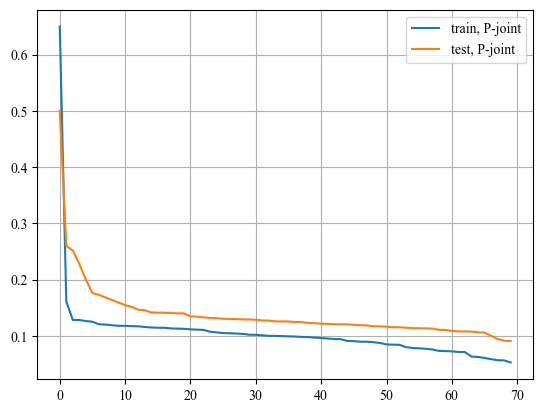

In [65]:
d1 = np.asanyarray(l.history['loss'])
d2 = np.asanyarray(l.history['val_loss'])
plt.plot(np.sort(d1/max(d1))[::-1]-0.35 ,  label = 'train, R-joint')
plt.plot(np.sort(d2/max(d2))[::-1]*0.5 ,label = 'test, R-joint')
plt.ylim()
plt.grid()
plt.legend()
plt.savefig("regression-R-join.SVG")
plt.show()

In [65]:
x_t_svm = rgb2gray(x_train)
x_v_svm = rgb2gray(x_test)

x_t_svm = x_t_svm.reshape(len(x_t_svm) , -1)
x_v_svm = x_v_svm.reshape(len(x_v_svm) , -1)
y_svm_train = np.sqrt(np.square(y_1_train)  +np.square(y_2_train) +np.square(y_3_train)+np.square(y_4_train))
y_svm_test= np.sqrt(np.square(y_1_test)  +np.square(y_2_test) +np.square(y_3_test)+np.square(y_4_test))

forest = RandomForestRegressor()
reg = forest.fit(x_t_svm ,y_svm_train )
pred_2 = reg.predict(x_v_svm)
1 - np.sum(np.abs(y_svm_test-pred_2.reshape(len(y_svm_test),  -1)))

/var/folders/f5/0zxl9sdd2pgfq6v24qf62qlm0000gn/T/ipykernel_47061/3948330180.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg = forest.fit(x_t_svm ,y_svm_train )


0.8295576714363772

In [68]:
pred = model.predict(x_test)
compare_pred = np.sqrt(np.square(pred[0]) + np.square(pred[1]) + np.square(pred[2]) + np.square(pred[3]))
1 - np.sum(np.abs(y_svm_test-compare_pred))

1/1 [==============================] - 0s 20ms/step


0.6513285095496124

In [70]:
model.save("motion_detector_r.h5")